# Introduction to data science: data

[**This notebook is available on Google Colab.**](https://colab.research.google.com/drive/1U_8I6k80LvgC6bwE6RgRvF6QI0cIdEQK)

#### This is a very quick introduction. Time needed: about an hour.

We'll explore the Pandas package for simple data handling tasks using geoscience data examples, and we'll follow it up with a quick look at `scikit-learn` for fitting machine learning models and making predictions.

## Reading a CSV

Pandas reads files from disk in tabular form &mdash; [here is a list](https://pandas.pydata.org/docs/user_guide/io.html) of all the formats that it can read and write. A very common format is CSV, so let's load one!

Conveniently, you can give `pandas` the CSV in a URL or a file path:

In [15]:
import pandas as pd

url = "https://raw.githubusercontent.com/scienxlab/datasets/main/rpc/rpc-3-imbalanced.csv"
df = pd.read_csv(url)
df.head()

,RPC,Description,Lithology,Vp,Vs,Rho
0,101023,Gray Shale,shale,4953.660011,2957.260132,2.71
1,100978,Olentangy Shale,shale,3444.658279,2318.002224,2.68
2,100993,Brown Gas Shale,shale,3507.803917,2218.529940,2.56
3,101048,Shale 2 (Density is assumed constant),shale,2988.889933,1633.329988,2.60
4,100417,Tight gas shale,shale,3642.000000,2221.000000,2.46


In [ ]:
# Lithology   - describes the (sedimentary ) rock type
# Description - Additional description of the lithology
# Vp          - P-wave velocity through the rock
# Vs          - S-wave velocity through the rock
# Rho         - Rock density
# RPC         - Rock Property Catalog index

In [16]:
df.dtypes

RPC              int64
Description     object
Lithology       object
Vp             float64
Vs             float64
Rho            float64
dtype: object

## Let's explore the data

- Get a column, plot a column
- Do (vectorized) math on column(s)
- Using `df.loc`
- Changing the index with `df.set_index()`
- Selecting subsets of `df` with `df.loc`
- Using `df.describe()` with `include='all'`

In [17]:
df['Vp']

0      4953.660011
1      3444.658279
2      3507.803917
3      2988.889933
4      3642.000000
          ...     
435    4625.980000
436    5446.190000
437    5446.190000
438    5347.770000
439    5347.770000
Name: Vp, Length: 440, dtype: float64

<Axes: >

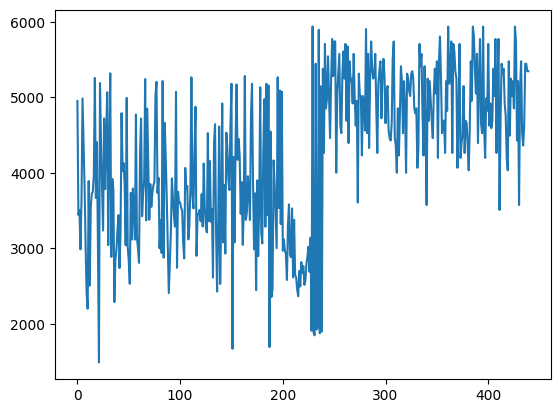

In [18]:
df['Vp'].plot()

In [19]:
df['Vp'] / 1000

0      4.953660
1      3.444658
2      3.507804
3      2.988890
4      3.642000
         ...   
435    4.625980
436    5.446190
437    5.446190
438    5.347770
439    5.347770
Name: Vp, Length: 440, dtype: float64

In [20]:
# By the way, this creates a "new" df, operations are not in-place 
df['Vp'] * 3 

0      14860.980033
1      10333.974837
2      10523.411751
3       8966.669799
4      10926.000000
           ...     
435    13877.940000
436    16338.570000
437    16338.570000
438    16043.310000
439    16043.310000
Name: Vp, Length: 440, dtype: float64

In [21]:
# Select one row based on default integer index.
df.loc[4]

RPC                     100417
Description    Tight gas shale
Lithology                shale
Vp                      3642.0
Vs                      2221.0
Rho                       2.46
Name: 4, dtype: object

In [22]:
# Change the row index.
# NB Can only run this once, because RPC is removed from columns.
df = df.set_index('RPC')
df.head()

,Description,Lithology,Vp,Vs,Rho
RPC,,,,,
101023,Gray Shale,shale,4953.660011,2957.260132,2.71
100978,Olentangy Shale,shale,3444.658279,2318.002224,2.68
100993,Brown Gas Shale,shale,3507.803917,2218.529940,2.56
101048,Shale 2 (Density is assumed constant),shale,2988.889933,1633.329988,2.60
100417,Tight gas shale,shale,3642.000000,2221.000000,2.46


In [23]:
# Select particular rows and only 2 columns.
df.loc[df['Vp'] > 5800, ['Vp', 'Vs']]

,Vp,Vs
RPC,,
102855,5940.00,3140.00
101136,5895.34,3227.69
102278,5905.51,3313.65
102111,5807.09,2896.98
102124,5938.32,3218.50
102101,5938.32,2926.51
102277,5807.09,3280.84
102103,5938.32,3379.27
102102,5938.32,3346.46


In [24]:
df.describe(include='all')

,Description,Lithology,Vp,Vs,Rho
count,440,440,440.000000,440.000000,428.000000
unique,74,3,NaN,NaN,NaN
top,Shale,shale,NaN,NaN,NaN
freq,31,200,NaN,NaN,NaN
mean,NaN,NaN,4241.400263,2404.569500,2.471570
std,NaN,NaN,1017.116305,623.491742,0.168254
min,NaN,NaN,1490.711927,839.570000,1.770000
25%,NaN,NaN,3444.243709,2008.362500,2.387500
50%,NaN,NaN,4396.045268,2559.060000,2.510000
75%,NaN,NaN,5150.920000,2858.632148,2.570000


### Exercise

- Have a quick look at [the Pandas documentation](https://pandas.pydata.org/docs/).
- How are the missing values distributed across the lithologies?
- The Gardner equation for computing density is given by $\rho_{\text{Gardner}} = 0.310 \times (V_p)^{0.25}$. Define a function that computes the Gardner density, then estimate and put it in a new column called `Rho_Gardner`.
- Use `sns.kdeplot()` to compare the distribution of the new column to the actual `Rho` data.
    -  EXTRA: You could also use `sns.histplot()`, which gives a slightly different representation. How do they differ, and can you make it closer to the representation from `kdeplot()`? Can you spot any issues with using any of these methods with default parameters?
- Fill the empty (NaN) values in density with your computed densities. <a title="Use `pd.Series.fillna()` on the 'Rho' column."><ins>Hover here for hint</ins>.</a>

In [25]:
df.groupby('Lithology').count()

,Description,Vp,Vs,Rho
Lithology,,,,
dolomite,200,200,200,200
limestone,40,40,40,28
shale,200,200,200,200


In [26]:
# One way.
def gardner(vp):
    """
    Compute density rho, based on P-wave velocity Vp,
    using the Gardner equation.
    """
    return 0.310 * vp**0.25

df['Rho_Gardner'] = gardner(df['Vp'])

In [27]:
# Functional.
df['Rho_Gardner'] = df['Vp'].map(gardner)

If we wanted to be more awesome, we could try fitting our own Gardner parameters to the data we have for this rock type.

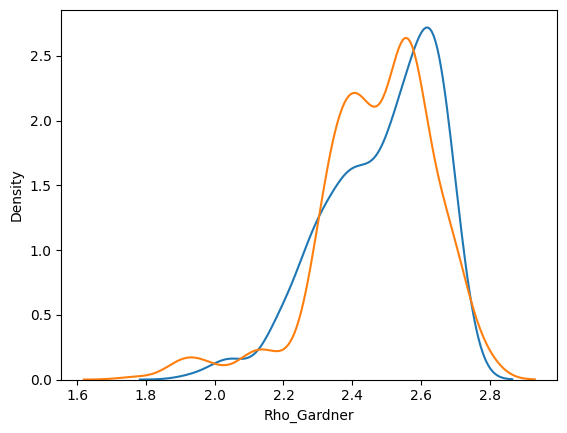

In [42]:
import seaborn as sns

ax = sns.kdeplot(df['Rho_Gardner'], ) # bw_adjust=0.5, cut=0
_ = sns.kdeplot(df['Rho'], ax=ax, ) # bw_adjust=0.5, cut=0

# notes on "how does kdeplot work": 
# it fits a gaussian distr. around each data point, with width 'bw_adjust',
# then sums all "distr. basis functions-ish" up to create the smooth distribution representation.
# Higher width, more smooth distr., but further from the "actual" histogram. Be aware!

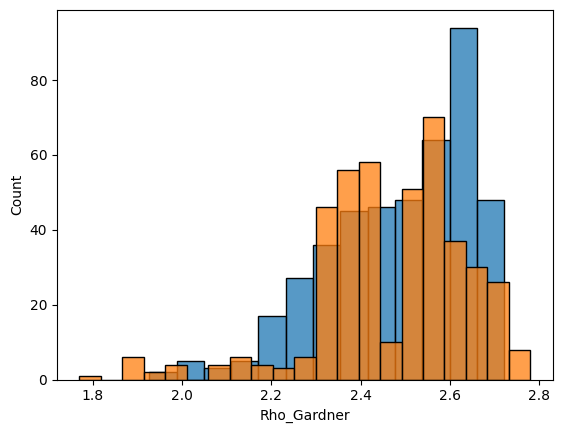

In [47]:
ax = sns.histplot(df['Rho_Gardner'],) #  kde=True, ec=None, stat='density', kde_kws={'bw_adjust':0.5}
_ = sns.histplot(df['Rho'], ax=ax, ) # kde=True, ec=None, stat='density', kde_kws={'bw_adjust':0.5}

In [ ]:
# kde plot fits a gaussian distribution around each point in the data, with width ‘bw_adjust’, then 
# sums it all up to create the smooth distribution. Higher width, more smooth distribution, 
# but further from the “actual” histogram. Be aware of misrepresenting you data! 

In [53]:
df['Rho'] = df['Rho'].fillna(df['Rho_Gardner'])
#df.describe()

,Vp,Vs,Rho,Rho_Gardner
count,440.000000,440.000000,440.000000,440.000000
mean,4241.400263,2404.569500,2.467141,2.486634
std,1017.116305,623.491742,0.175744,0.161517
min,1490.711927,839.570000,1.770000,1.926239
25%,3444.243709,2008.362500,2.370000,2.374844
50%,4396.045268,2559.060000,2.510000,2.524220
75%,5150.920000,2858.632148,2.570000,2.626231
max,5940.000000,3477.690000,2.780000,2.721500


## Visual exploration of the data

We can easily visualize the properties of each variable, both individuallt and pairwise, using a `PairPlot`. The library `seaborn` integrates with matplotlib to make these kind of plots easily.

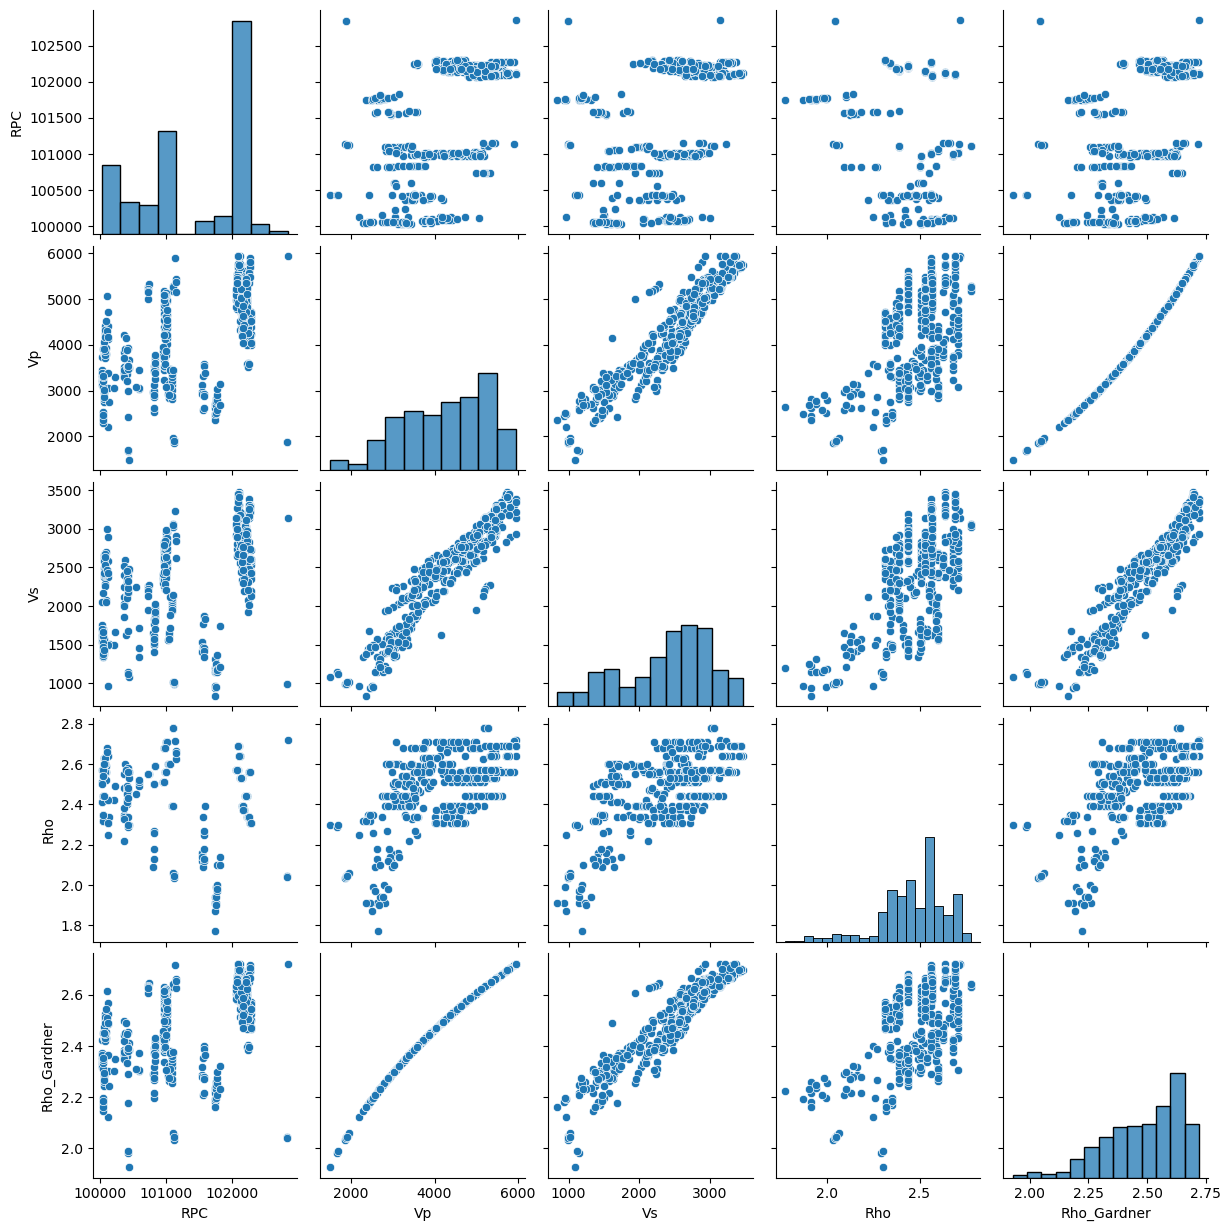

In [11]:
import seaborn as sns

sns.pairplot(df)

In [ ]:
# Some nice observations:
# - Rho vs Rho_Gardner does not match perfectly, larger spread for lower values(?), higher Rho_Gardner for higher Rho values (also visible in the hist)
# - Vp vs Vs seem to have a linear relationship, Vp vs Rho seem vaguely quadratic, but kinda hard to say, quite spread for higher values
# - Rho_Garder is an exponential transformation of Vp, so it looks very smooth naturally

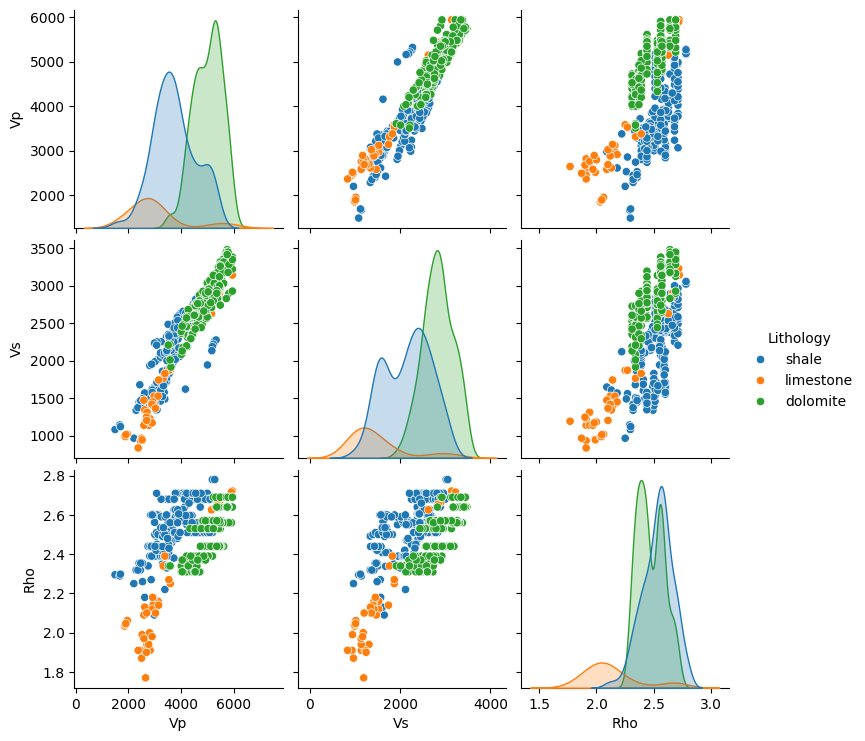

In [54]:
sns.pairplot(df,
             hue="Lithology",
             vars=['Vp','Vs','Rho'])

In [ ]:
# - If we would like to do classification of lithologies, any of the three features can separate limestone from shale/dolomite
# - Rho + Vp (Vs to lesser extent) together seem to allow us to separate shale and dolomite. 
# - This can give us some ideas for which features to include in a potential classification model

We can have a lot of control over all of the elements in the pair-plot by using the `PairGrid` object.

In [ ]:
import matplotlib.pyplot as plt

g = sns.PairGrid(df, hue="Lithology", vars=['Vp','Vs','Rho'], height=4)

g.map_upper(plt.scatter, alpha=0.4) # alpha=0
#g.hue_kws={'marker': ['x','o','x']}
g.map_lower(plt.scatter, alpha=0.4) # alpha=0.7
g.map_diag(plt.hist, bins=20,)
g.add_legend()

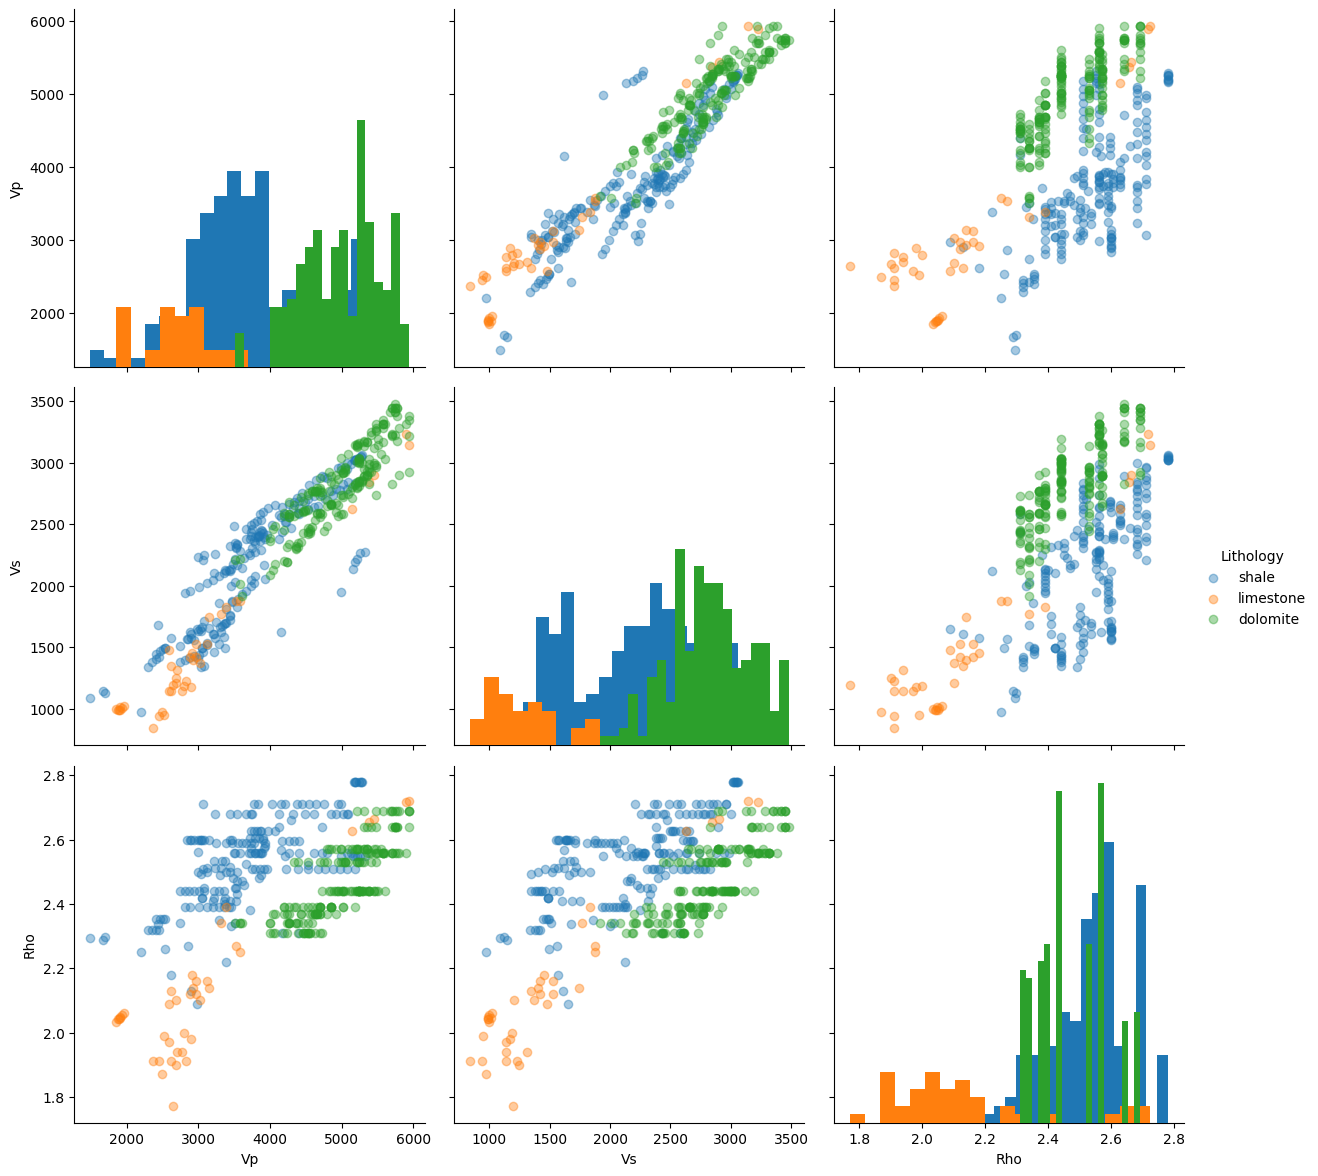

In [79]:
import matplotlib.pyplot as plt

g = sns.PairGrid(df, hue="Lithology", vars=['Vp','Vs','Rho'], height=4)

g.map_upper(plt.scatter, alpha=0.4)
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist, bins=20,)
g.add_legend()

## Export for machine learning

### EXERCISE

Export the following columns to a new CSV, in this order: Rho, Vp, Vs, and Lithology. Some details:

- Call the file `mydata.csv`.
- Use 3 decimal places for all floats.
- Make sure Pandas does not include the RPC catalog numbers.

In [80]:
features = ['Rho', 'Vp', 'Vs']
target = ['Lithology']

df[features + target].to_csv("./mydata.csv", index=False, float_format='%.3f')

<hr />

<p style="color:gray"> adapted from ©2024 Matt Hall / Equinor. Licensed CC BY.</p>